\***\*============================GRAPH PREPROCESSING============================**


In [2]:
# import networkx as nx
# import random
# import matplotlib.pyplot as plt

# # Create an empty undirected graph
# G = nx.Graph()

# # Add 50 nodes to the graph
# G.add_nodes_from(range(50))

# # Add 100 edges with random weights between 1 and 10
# while len(G.edges) < 100:
#     u = random.randint(0, 49)
#     v = random.randint(0, 49)
#     if u != v and not G.has_edge(u, v):
#         # weight = random.randint(1, 10)/
#         G.add_edge(u, v)

# # Write the edges with weights to a text file
# with open('small_dataset.txt', 'w') as f:
#     for (u, v) in G.edges:
#         f.write(f"{u} {v} \n")



100


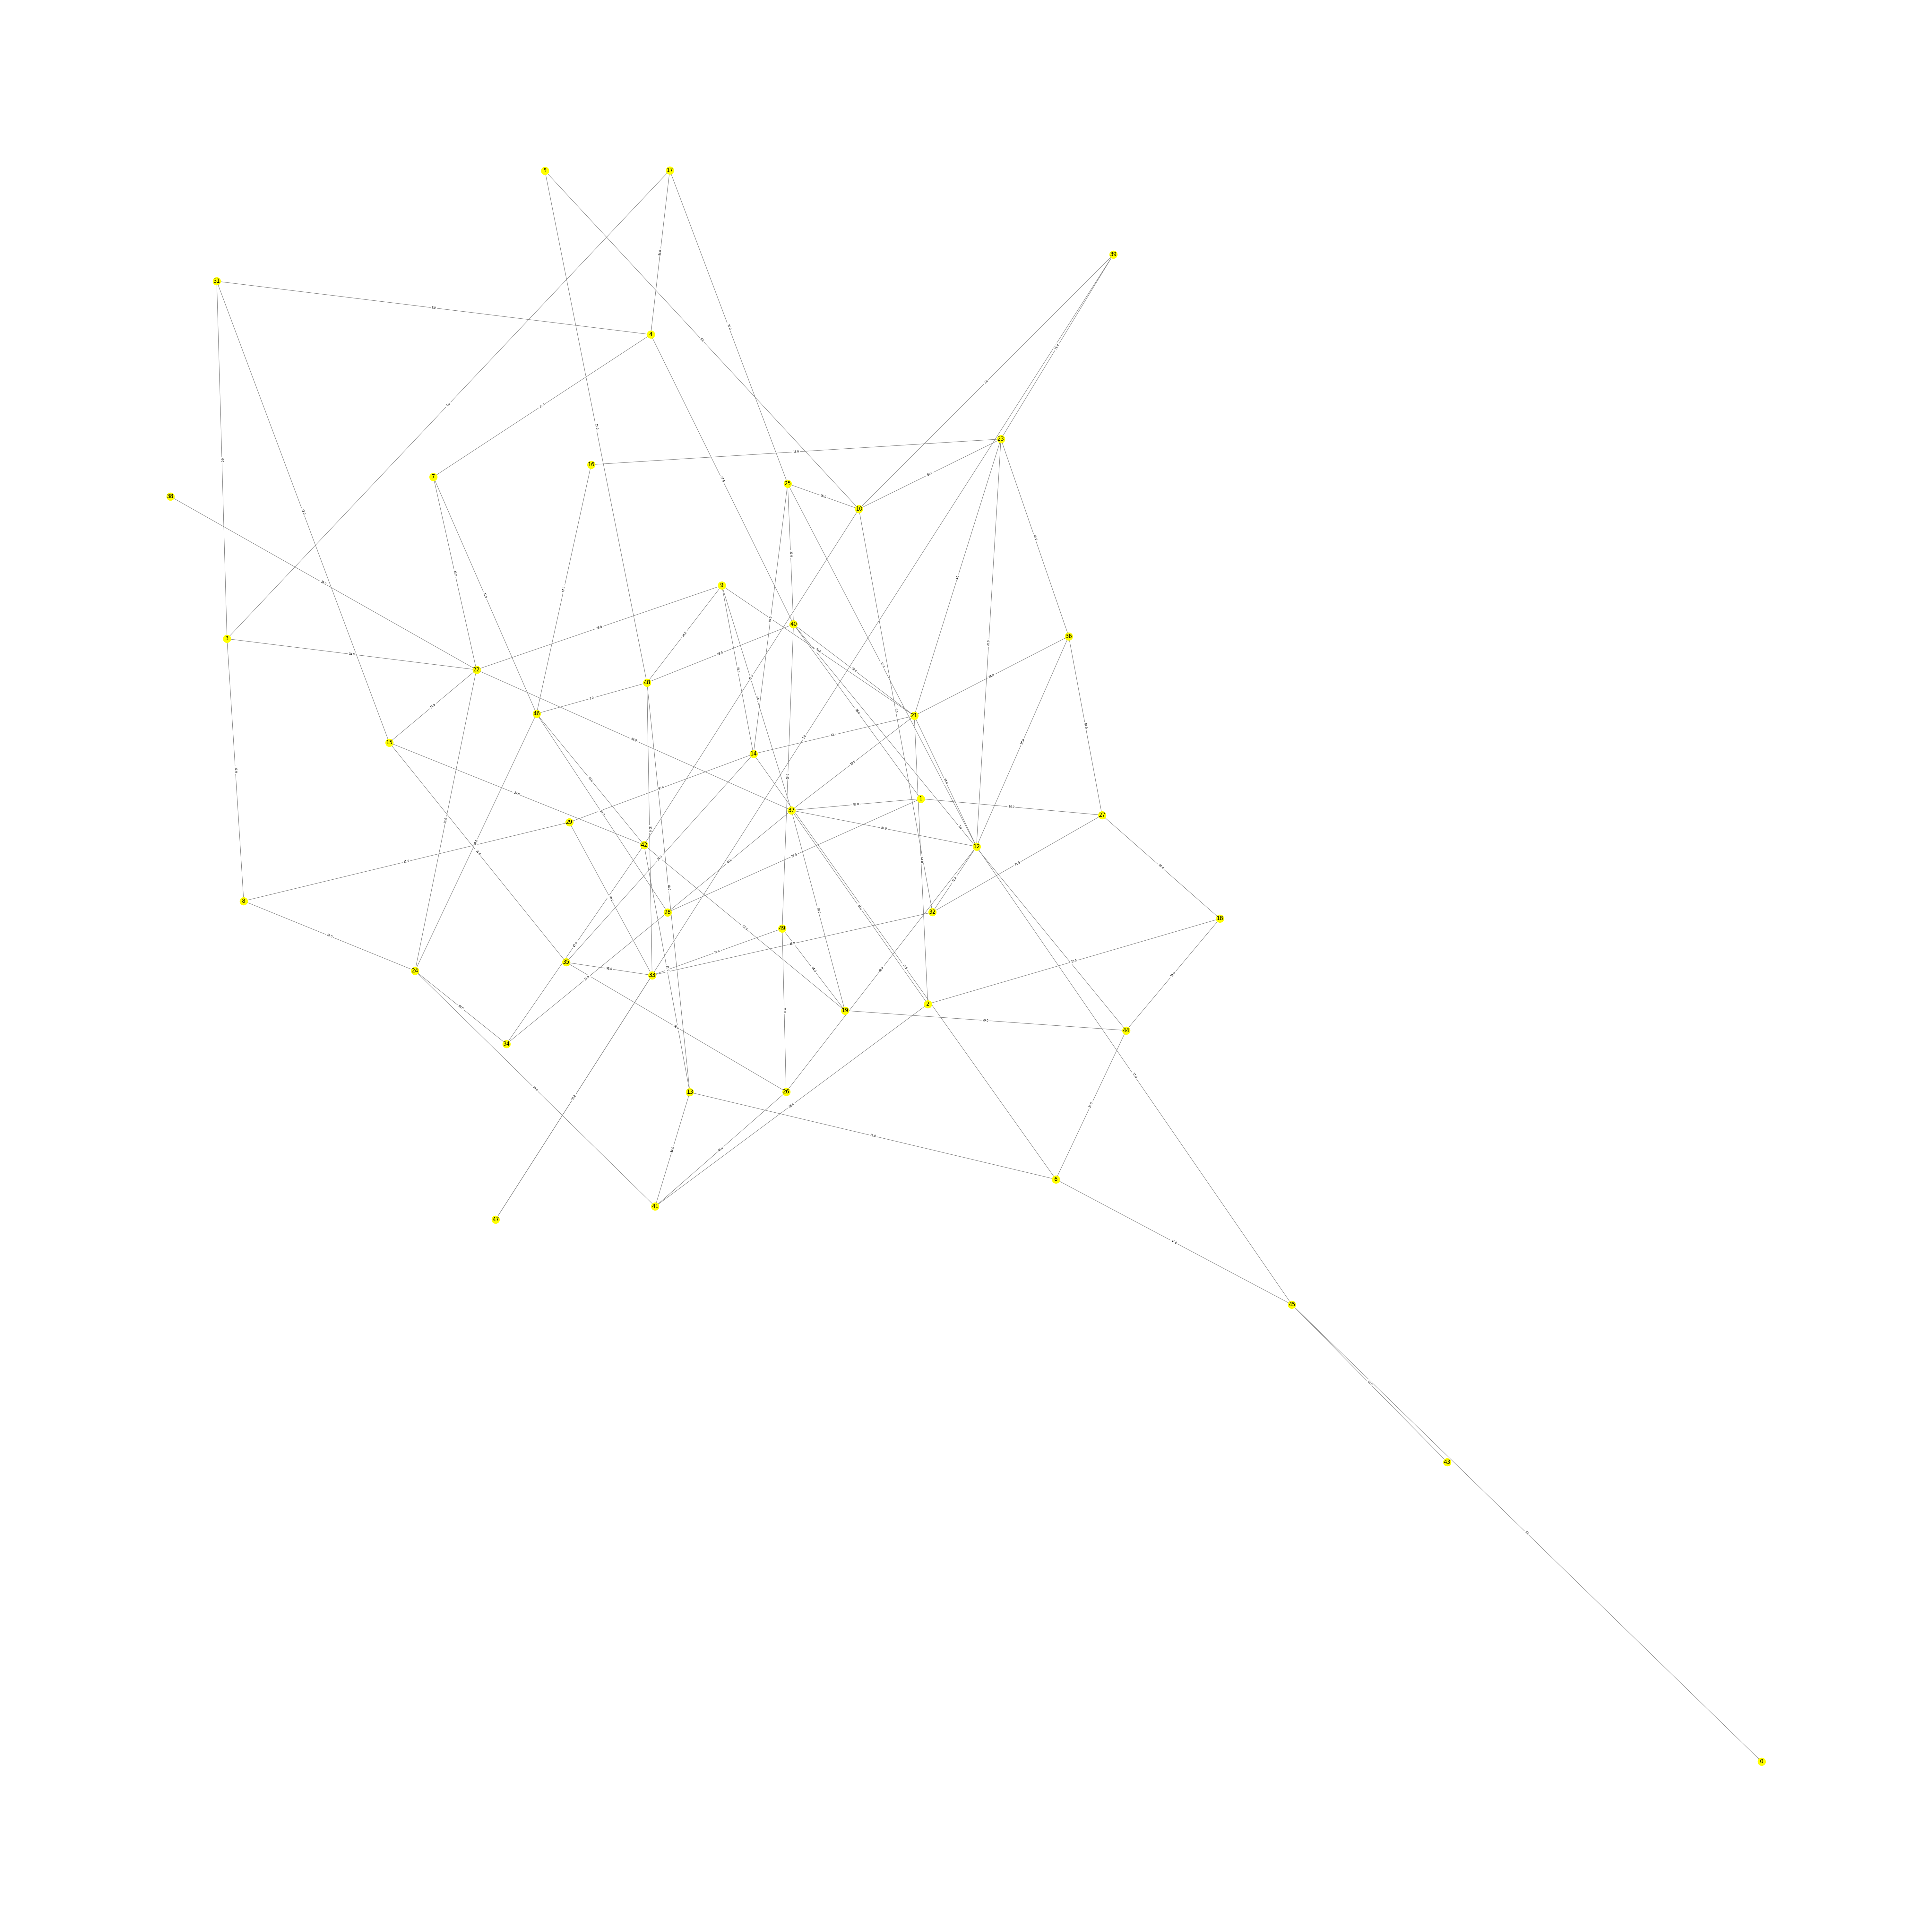

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

# Define the Edge class
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight
def preprocess_graph(G):
    # assuming 'weight' is the name of the attribute for edge weights
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Read the file and create edges with random weights
file_path = 'small_dataset.txt'  # Replace with the actual file path
edges = []
with open(file_path, 'r') as file:
    file_contents = file.readlines()
    num_lines = len(file_contents)
    print(num_lines)
    for i, line in enumerate(file_contents):

        node1, node2 = map(int, line.split())
        weight = randint(1, 99) + (1 / (2 ** (num_lines + i + 1)))
        edges.append(Edge(node1, node2, weight))

# Create a NetworkX graph and add edges
G = nx.Graph()
for edge in edges:
    G.add_edge(edge.u, edge.v, weight=edge.weight)

# Preprocess the graph
D = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Create a new figure with a larger size
plt.figure(figsize=(60, 60))

# Draw the graph using the spring_layout
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="yellow", node_size=300, edge_color="gray")

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.show()

=================================== Distance Oracle =====================================


In [4]:
class DistanceOracle:
    def __init__(self, distances=None):
        if distances is None:
            self.data = {}
        else:
            self.data = distances

    def get_distance(self, u, v):
        return self.data.get(u, {}).get(v, float("inf"))

    def __getitem__(self, key):
        return self.data[key]

    def add_distance(self, u, v, distance):
        if u not in self.data:
            self.data[u] = {}
        self.data[u][v] = distance

    # def add_edge(u, v, weight):
    #     G.add_edge(u, v, weight=weight)

    # def get_edge_weight(G, u, v):
    #     if G.has_edge(u, v):
    #         return G[u][v]['weight']
    #     else:
    #         return None

In [5]:
# Create an instance of
distance_oracle = DistanceOracle(D)

\*\*---------------------------------SHORTEST PATH function and Store-------------------------------


In [6]:
import networkx as nx

def store_shortest_paths(G):
    # Use NetworkX's built-in function to compute all pairs shortest paths
    all_pairs_paths = dict(nx.all_pairs_dijkstra_path(G, weight='weight'))
    
    # Flatten the dictionary to match the desired output format
    shortest_paths = {}
    for u, paths in all_pairs_paths.items():
        for v, path in paths.items():
            shortest_paths[(u, v)] = path
    
    return shortest_paths

# Example usage
shortest_paths = store_shortest_paths(G)



---------------------------------POWER_OF_2 FUNCTION--------------------------------


In [7]:
import math


def nearest_power_of_2(x):
    if x <= 0:
        return 0  # Return 1 for non-positive input
    elif math.isinf(x):
        return float('inf')  # Return infinity for infinite input
    else:
        return 2 ** math.floor(math.log2(x))

--------------------------------FIND_JUMP FUNCTION--------------------------------


In [8]:
def FINDJUMP(P, F):
    X = []  # Initialize X with s
    x = P[0]
    X.append(x)
    # F = list(F)
    # vertices = [F.u , F.v]
   
    if(nearest_power_of_2(
        distance_oracle.get_distance(x, F[0])) < nearest_power_of_2(distance_oracle.get_distance(x, F[1]))):
            u = F[0]
    else:
        u = F[1]
    
    # u = min(F, key=lambda v: nearest_power_of_2(
    #     distance_oracle.get_distance(x, v)))
    # print(u)
    while True:
        # Find y, the first vertex on P[x, t] at distance >= max{1, (xu)^2} from x
        distance = max(1, nearest_power_of_2(
            distance_oracle.get_distance(x, u)))
        # print(distance)
        y = None
        for vertex in P[P.index(x)+1:]:
            if distance_oracle.get_distance(x, vertex) >= distance:
                y = vertex
                break
        if y is not None:
            X.append(y)
            x = y
        else:
            break
    return X

In [9]:
# m = FINDJUMP([13 , 6, 3], [6, 3])

# print(m)
# print(FINDJUMP(shortest_paths[(19, 6)] , [6,3]) )


**------------------------------MAXIMIZER FUNCTION--------------------------------
**


In [10]:
def get_edge_weight(G, u, v):
    if G.has_edge(u, v):
        return G[u][v]['weight']
    else:
        return float('inf') 
    


In [11]:

# def maximizer(G ,x, y, d1, d2):
     
#     max_edges = set()
#     edges_set = set()
#     max_xy_edge = None
#     max_xy_path = None
#     max_xy_path_new = None
#     # xy_distance = distanc_oracle.get_distance(x, y)
#     # make the set of edges in xy path
#     if nx.has_path(G, x, y):
#         # Get the path and it length
#         path = shortest_paths[(x, y)]
#         # print(path)
#         for i in range(len(path) - 1):
#             u = path[i]
#             v = path[i +1]
#             edge = (u, v)
#             edges_set.add(edge)
#     # print(edges_set)
#     # check max edges i edge list
#     for u, v in edges_set:
#         # Check if the distance from x to the edge and y to the edge are at least d1 and d2
#         if (
#             #nx.has_path(G, x, u)
#             # and nx.has_path(G, y,v)
#             # and
#             ((distance_oracle.get_distance(x, u) >= d1
#              and distance_oracle.get_distance(y, v) >=d2))
         
#         ):
#             max_edge1 = (u, v)
#             max_edges.add(max_edge1)
#     for u, v in max_edges:
#         max_xy_distance = float('-inf')
#         # Create a copy of the graph for modification
#         G_copy = G.copy()
#         edge_attributes = G_copy.get_edge_data(u, v)
#         # original_weight = edge_attributes['weight']
#         # Remove the (u, v) edge from the copy
#         if G_copy.has_edge(u, v):
#             G_copy.remove_edge(u, v)
#         # Calculate the xy path distance using the modified copy
#         D = preprocess_graph(G_copy)
#         distance_oracle_new = DistanceOracle(D)
#         if nx.has_path(G_copy, x, y):  # Ensure there is still a path
#             xy_path = nx.dijkstra_path(G_copy, x, y, weight='weight')
#             max_uv_distance = distance_oracle_new.get_distance(x, y)
#             if max_uv_distance > max_xy_distance:
#                 max_xy_edge = (u, v)
#                 max_xy_path = xy_path
#                 max_xy_distance = max_uv_distance
  
#     # # chandge max_xy_path to 2D-composable form
    
    
#     if max_xy_path is not None:
#         s=0
#         max_xy_path_new = []
#         for i in range(len(max_xy_path) - 1):
#             u = max_xy_path[s]
#             v = max_xy_path[i + 1]
#             uv_distance = distance_oracle.get_distance(u, v)
#             uv_distance_path = sum(
#                 get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
#                 for j in range(s, i + 1)
#             )
#             # print(f"uv_distance:{uv_distance}")
#             # print(f"uv_distance_path:{uv_distance_path}")
#             # s_to_a_path = [u]
#             if uv_distance != uv_distance_path:
#                 if i < (len(max_xy_path) - 2):
#                     s_to_a_path = [u]
#                     intermediate_edge = (v, max_xy_path[i + 2])
#                     # print(f"intermediate:{intermediate_edge}")
#                     # print(f"i:{i}")
#                     s_to_a_path.append(max_xy_path[i])
#                     max_xy_path_new.append(s_to_a_path)
#                     max_xy_path_new.append(intermediate_edge)
#                     s = i + 2
#         max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        
#         if len(max_xy_path_new) == 1:
#             max_xy_path_new = []
#             max_xy_path_new.append(max_xy_path)
#     return max_xy_edge, max_xy_path_new

In [12]:
 
def maximizer(G, x, y, d1, d2):
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_path_new = None

    # Cache distance calculations
    distance_cache = {}

    def get_distance_cached(node1, node2):
        if (node1, node2) not in distance_cache:
            distance_cache[(node1, node2)] = distance_oracle.get_distance(node1, node2)
        return distance_cache[(node1, node2)]

    if nx.has_path(G, x, y):
        path = shortest_paths[(x, y)]
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edges_set.add((u, v))

    for u, v in edges_set:
        if get_distance_cached(x, u) >= d1 and get_distance_cached(y, v) >= d2:
            max_edges.add((u, v))

    max_xy_distance = float('-inf')
    for u, v in max_edges:
        G_copy = G.copy()
        if G_copy.has_edge(u, v):
            G_copy.remove_edge(u, v)
        D = preprocess_graph(G_copy)
        distance_oracle_new = DistanceOracle(D)
        if nx.has_path(G_copy, x, y):
            xy_path = nx.dijkstra_path(G_copy, x, y, weight='weight')
            max_uv_distance = distance_oracle_new.get_distance(x, y)
            if max_uv_distance > max_xy_distance:
                max_xy_edge = (u, v)
                max_xy_path = xy_path
                max_xy_distance = max_uv_distance

    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = get_distance_cached(u, v)
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[-1]])

        if len(max_xy_path_new) == 1:
            max_xy_path_new = [max_xy_path]

    return max_xy_edge, max_xy_path_new


==============================MAXIMIZER Storage=========================================


In [13]:



def find_max_distance(G, distance_oracle):
    max_distance = float("-inf")
    for key1, value1 in distance_oracle.items():
        for key2, value2 in value1.items():
            if value2 > max_distance:
                max_distance = value2
    return max_distance
print(find_max_distance(G, D))




216.0


In [14]:
max_d_value = int(find_max_distance(G, D))
d1_d2_list = [0]
i = nearest_power_of_2((max_d_value))

while i >= 1:
    d1_d2_list.append(i)
    i //= 2

In [15]:
# import networkx as nx
# from concurrent.futures import ThreadPoolExecutor, as_completed

# # Initialize a dictionary to store the maximizer output
# maximizer_dict = {}

# # Store the maximizer function reference directly
# maximizer_function = maximizer  # Replace 'maximizer' with the actual function name

# # Collect errors to print after the loop
# errors = []

# # Define a function to process a single pair of nodes
# def process_pair(G, x, y, d1, d2):
#     try:
#         result = maximizer_function(G, x, y, d1, d2)
#         if result is not None:
#             max_edge, max_path = result
#             return (x, y, d1, d2), (max_edge, max_path)
#     except nx.NetworkXNoPath:
#         return (x, y, d1, d2), None

# # Use ThreadPoolExecutor to parallelize the computation
# with ThreadPoolExecutor() as executor:
#     futures = []
#     for x in G.nodes:
#         for y in G.nodes:
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         futures.append(executor.submit(process_pair, G, x, y, d1, d2))

#     for future in as_completed(futures):
#         key, result = future.result()
#         if result is not None:
#             maximizer_dict[key] = result
#         else:
#             errors.append(f"No path between {key[0]} and {key[1]} for d1: {key[2]}, d2: {key[3]}.")

# # Print all errors after the loop
# for error in errors:
#     print(error)

# # print(maximizer_dict)

===============================MAIN: QUERY FUNCTION====================================


In [16]:
from concurrent.futures import ThreadPoolExecutor, as_completed

def is_valid_path(G, path):
    return all(G.has_edge(path[i], path[i+1]) for i in range(len(path) - 1)) and (len(path) < 2 or G.has_edge(path[-2], path[-1]))

def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result

def QUERY(s, t, e):
    # Check if the edge e is in the graph
    if not (G.has_edge(e.u, e.v) or G.has_edge(e.v, e.u)):
        return [], float('inf')

    # Swap e.u and e.v if necessary
    if distance_oracle.get_distance(s, e.u) > distance_oracle.get_distance(s, e.v):
        e.u, e.v = e.v, e.u

    # Check if there is a valid path between s and t
    if shortest_paths[(s, t)] is None and shortest_paths[(t, s)] is None:
        return [], float('inf')

    JUMP_st = FINDJUMP(shortest_paths[(s, t)], [e.u, e.v])
    JUMP_ts = FINDJUMP(shortest_paths[(t, s)], [e.u, e.v])

    final_shortest_path = []
    shortest_path_distance = float("inf")

    # Cache for distance_oracle.get_distance
    distance_cache = {}

    def get_distance_cached(x, y):
        if (x, y) not in distance_cache:
            distance_cache[(x, y)] = distance_oracle.get_distance(x, y)
        return distance_cache[(x, y)]

    def process_pair(x, y):
        if x == y:
            return None, float('inf')

        d1 = nearest_power_of_2(get_distance_cached(x, e.u))
        d2 = nearest_power_of_2(get_distance_cached(y, e.v))

        e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
        if xy_e_star is None:
            xy_e_star = []
        elif len(xy_e_star) > 2:
            xy_e_star = shortest_paths[(xy_e_star[0][0], xy_e_star[0][1])] + [xy_e_star[1][0]] + shortest_paths[(xy_e_star[2][0], xy_e_star[2][1])]
        else:
            xy_e_star = xy_e_star[0]

        sx_path = shortest_paths[(s, x)] or [x]
        yt_path = shortest_paths[(y, t)] or [y]

        P = remove_duplicates(sx_path + xy_e_star[1:-1] + yt_path)
        if is_valid_path(G, P):
            p_distance = sum(get_edge_weight(G, P[i], P[i+1]) for i in range(len(P) - 1))
            p_edges = {(P[i], P[i+1]) for i in range(len(P) - 1)}
            if (e.u, e.v) not in p_edges and (e.v, e.u) not in p_edges:
                return P, p_distance
        return None, float('inf')

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_pair, x, y) for x in JUMP_st for y in JUMP_ts]
        for future in as_completed(futures):
            P, p_distance = future.result()
            if p_distance < shortest_path_distance:
                final_shortest_path = P
                shortest_path_distance = p_distance

    return final_shortest_path, shortest_path_distance

==================================== USer Input & FINAL OUTPUT =================================


In [44]:
# # Get user input for source and destination vertices
# try:
#     s, t = map(int, input(
#         "Enter source and destination vertices (s t): ").split())
# except ValueError:
#     print("Invalid input. Please enter two integers separated by a space.")
#     exit()
# # Get user input for the edge to avoid and its weight
# try:
#     e_u, e_v = map(int, input(
#         "Enter the edge to avoid and its weight (u v): ").split())
# except ValueError:
#     print("Invalid input. Please enter two integers separated by a space.")
#     exit()
# # Check if the vertices and the edge exist in the graph
# if not (G.has_node(s) and G.has_node(t) and (G.has_edge(e_u, e_v) or G.has_edge(e_v, e_u))):
#     print("Invalid input. The vertices or the edge do not exist in the graph.")
#     exit()
# # Create an Edge object for the edge to avoid
# e = Edge(e_u, e_v, distance_oracle.get_distance(e_u, e_v))
# # Call the QUERY function with the instance of DistanceOracle
# path = QUERY(s, t, e)
# # Print the path
# if path is None:
#     print("No path found.")
# else:
#     print("Path:", path)

**Check Corretness of path between s to t after avoiding edg**


In [17]:

def cross_check(G, s, t, e_u, e_v):
    edge_exists = G.has_edge(e_u, e_v)
    if edge_exists:
        edge_data = G.get_edge_data(e_u, e_v)
        G.remove_edge(e_u, e_v)

    st_path = nx.dijkstra_path(G, s, t, weight='weight')

    # Add the edge back to the graph
    if edge_exists:
        G.add_edge(e_u, e_v, **edge_data)

    return st_path


# print(QUERY(13, 19, Edge(6, 3, get_edge_weight(G, 6, 3))))
# print(cross_check(G, 13, 19, 6, 3))


# print(QUERY(13, 19, Edge(3, 6, get_edge_weight(G, 3, 6))))
# print(cross_check(G, 13, 19, 3 , 6))

# print(QUERY(13, 19, Edge(1, 3, get_edge_weight(G, 1, 3))))
# print(cross_check(G, 13, 19, 1, 3))

# print(QUERY(13, 19, Edge(2, 1, get_edge_weight(G, 2, 1))))
# print(cross_check(G, 13, 19, 2, 1))



In [18]:
import random   
import time

def test_query(G, s, t, e_u, e_v):
    print(f"shortest st path: {shortest_paths[(s, t)]}")    
    print(f"Source: {s}, Destination: {t}, Edge to avoid: {e_u}-{e_v}")
    Q_time = time.time()
    P1 = QUERY(s, t, Edge(e_u, e_v, get_edge_weight(G, e_u, e_v)))
    Q_time = time.time() - Q_time
    
    C_time = time.time()
    P2 = cross_check(G, s, t, e_u, e_v)
    C_time = time.time() - C_time
    print(P1)
    print(f"QUERY time: {Q_time:.6f} seconds")
    print(P2)
    print(f"Cross-check time: {C_time:.6f} seconds")
    
    if P1 == P2:
       return print("Paths match.")
    else:
       return print("Paths do not match.")
   
   

for i in range(15):
    print(f"Test {i+1}:")
    s = random.randint(0, 49)
    t = random.randint(0, 49)
    e_u = random.randint(0, 49)
    e_v = random.randint(0, 49)
    test_query(G, s, t, e_u, e_v)
    print("\n")

     





Test 1:
shortest st path: [37, 9, 22, 3]
Source: 37, Destination: 3, Edge to avoid: 32-20
([], inf)
QUERY time: 0.000000 seconds
[37, 9, 22, 3]
Cross-check time: 0.000000 seconds
Paths do not match.


Test 2:
shortest st path: [12, 36]
Source: 12, Destination: 36, Edge to avoid: 20-13
([], inf)
QUERY time: 0.000000 seconds
[12, 36]
Cross-check time: 0.000000 seconds
Paths do not match.


Test 3:
shortest st path: [15, 35, 14, 6]
Source: 15, Destination: 6, Edge to avoid: 34-18
([], inf)
QUERY time: 0.000000 seconds
[15, 35, 14, 6]
Cross-check time: 0.000000 seconds
Paths do not match.


Test 4:
shortest st path: [34, 42, 10, 32, 33]
Source: 34, Destination: 33, Edge to avoid: 0-11
([], inf)
QUERY time: 0.000000 seconds
[34, 42, 10, 32, 33]
Cross-check time: 0.000520 seconds
Paths do not match.


Test 5:
shortest st path: [13, 6, 14]
Source: 13, Destination: 14, Edge to avoid: 18-38
([], inf)
QUERY time: 0.000000 seconds
[13, 6, 14]
Cross-check time: 0.000520 seconds
Paths do not match.

KeyError: (42, 11)